# Тестовое задание на позицию интернет - аналитика (web-аналитика, digital - аналитика) в одно из крупнейших рекламных агентств.

Выполнила *Ващилина Елена*  
Тбилиси, Грузия  
Telegram: @Vas4elno4ka  
e-mail: elena.vashchylina@gmail.com


## Содержание

1) [Описание проекта](#anchor_1)  
2) [Изучение данных из файла. Предобработка данных](#anchor_2)  
3) [Оценка результативности проведенных рекламных кампаний и гипотезы по увеличению дохода](#anchor_3)  
4) [Общий вывод](#anchor_4)  

## Визуальные материалы по исследованию

[Презентация](https://drive.google.com/file/d/1X3zHlg484m9pDsXnevgDoS268LRHAapE/view?usp=sharing) подготовленная в формате pdf.  

<a id='anchor_1'></a>
## Описание проекта

Ситуация:

есть очень крупный мебельный магазин, и рекламой занимаются несколько менеджеров. Они в рамках своих компетенций оптимизируют и управляют рекламными кампаниями. Необходимо провести исследование и выдвинуть гипотезы по увеличению дохода не менее, чем на 10%.

**Цель исследования:**  
Увеличить доход не менее, чем на 10% при сохранении текущего бюджета.

**Задачи исследования:**  
1. Проанализировать данные по рекламным кампаниям.
2. Найти зоны роста.
3. Сформировать пул гипотез/ предложений на следующий месяц.
4. Визуализировать результаты исследования.

**Описание данных:**  
Данные представляют собой набор сведений о рекламных кампаниях, проведённых в отчетном месяце. Данные приведены в виде таблицы Google Sheets.

**Ход исследования:**  
1) Провести обзор данных, привести их к удобному для исследования виду.  
2) Рассчитать дополнительные метрики и провести оценку результативности проведенных рекламных кампаний.  
3) Выдвинуть гипотезы по увеличению дохода при сохранении текущего бюджета.  
4) Визуализация результатов исследования.  
5) Общий вывод.

 <a id='anchor_2'></a>
 ## Изучение данных из файла. Предобработка данных

Для начала произведём импорт всех необходимых нам библиотек, установим формат для отображения вещественных чисел:

In [1]:
# импорт библиотеки pandas
import pandas as pd

#импорт библиотеки numpy для операций с массивами
import numpy as np

# импорт библиотеки визуализации seaborn
import seaborn as sns

# импорт библиотеки matplotlib для продвинутой работы с графиками
import matplotlib.pyplot as plt

# установим по умолчанию вид отображения вещественных чисел с двумя знаками после запятой
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# зафиксируем размер графиков
plt.rcParams["figure.figsize"] = (12,6)

# зададим цветовую палитру для графиков
sns.set_palette('pastel') 

Прочитаем данные и посмотрим на первые 5 строк и общую информацию о таблице:

In [2]:
df = pd.read_excel('df_marketing.xlsx')
df.sample(10)

,Кампания,Стоимость,Цена за клик,Цена за конверсию,Цена за транзакцию,Доход от клика,Доход,Рентабельность инвестиций в рекламу
313,yd_sta_mebel_likvid_network_cpa_ctr,29408.66,21.58,205.65,29408.66,11.68,14990.00,0.54
391,yd_msk_couches_cvet_selling-words_search-v2,20430.02,90.00,2270.00,0.00,0.00,0.00,0.00
421,yd_volgd_wardrobe_generic_search_v5,18136.12,69.49,1511.34,0.00,0.00,0.00,0.00
110,yd_tyum_smart_banner_retargeting_new_lal_roi,71272.75,45.31,269.97,35636.38,30.41,47820.00,0.67
371,yd_kra_smart_banner_retargeting_new_dop-cat_cpa,23290.11,30.33,158.44,5822.53,103.06,77540.00,3.40
19,yd_spb_couches_specific_search_v5,320791.19,74.85,1887.01,106930.40,15.62,66270.00,0.21
379,yd_sim_wardrobe_generic_search_v5,22606.74,82.81,1412.92,0.00,0.59,0.00,0.01
38,yd_kazan_couches_kreslo_all-types_search,166384.97,68.84,647.41,33276.99,37.21,89944.00,0.54
380,yd_vld_korpus_mebel_search,22342.61,79.51,3191.80,0.00,0.00,0.00,0.00
115,yd_ekb_smart_banner_retargeting_new_prioritet,68337.65,52.41,471.29,68337.65,29.51,38480.00,0.56


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Кампания                             500 non-null    object 
 1   Стоимость                            501 non-null    float64
 2   Цена за клик                         501 non-null    float64
 3   Цена за конверсию                    501 non-null    float64
 4   Цена за транзакцию                   501 non-null    float64
 5   Доход от клика                       501 non-null    float64
 6   Доход                                501 non-null    float64
 7   Рентабельность инвестиций в рекламу  501 non-null    float64
dtypes: float64(7), object(1)
memory usage: 31.4+ KB


Для удобства написания кода переименум столбцы:

In [4]:
df = df.rename(columns = {'Кампания':'camp', 'Стоимость':'cost', 'Цена за клик':'click_price', 
                                    'Цена за конверсию':'conv_price', 'Цена за транзакцию':'trans_price', 
                                    'Доход от клика':'click_revenue', 'Доход':'revenue',
                          'Рентабельность инвестиций в рекламу':'profit'})
df.columns

Index(['camp', 'cost', 'click_price', 'conv_price', 'trans_price',
       'click_revenue', 'revenue', 'profit'],
      dtype='object')

Можно заметить, что в таблице есть строка  без названия рекламной кампании. Посмотрим на неё:

In [5]:
df[df['camp'].isna() == True]

,camp,cost,click_price,conv_price,trans_price,click_revenue,revenue,profit
500,NaN,42961531.59,54.61,370.44,17938.01,104.56,81192699.00,1.91


Мы видим очень большие числа о стоимости и доходе - очень похоже на ошибочные данные. Удалим эту строку:

In [6]:
df = df.dropna(subset=['camp']).reset_index(drop=True)
df.shape

(500, 8)

Определим уровень располагаемого бюджета, а также размер текущего дохода и минимального желаемого (с учетом прироста на 10%):

In [7]:
total_cost = df['cost'].sum()
print('Располагаемый бюджет: ', round(total_cost,  2))
total_revenue = df['revenue'].sum()
print('Текущий доход: ', round(total_revenue, 2))
increased_revenue = 1.1 * total_revenue
print('Минимальный желаемый доход: ', round(increased_revenue, 2))
delta_revenue = increased_revenue - total_revenue
print('Прирост дохода: ', round(delta_revenue, 2))

Располагаемый бюджет:  41534217.55
Текущий доход:  78217127.0
Минимальный желаемый доход:  86038839.7
Прирост дохода:  7821712.7


Отфильтруем строки с нулевым доходом - данные рекламные кампании оказались безуспешными, нет смысла далее вкладываться в них. Определим сумму затрат по этим строкам, так мы узнаем размер бюджета, который можно вложить в другие успешные кампании:

In [8]:
null_cost = df[df['revenue'] == 0]['cost'].sum()
print('Бюджет для перераспределения: ', round(null_cost,  2))

Бюджет для перераспределения:  8209048.51


Можно заметить, что в названиях рекламных кампаний можно найти дополнительную информацию о характерных чертах этих кампаний. Таких, как, например, географии применения или типе рекламы. Посмотрим на эти названия:

In [9]:
df['camp'].unique()

array(['yd_msk_brand_search-v2', 'yd_msk_dsa_pg_search',
       'yd_msk_magazin-mebeli_asmaster',
       'yd_spb_smart_banner_retargeting_new_lal_roi',
       'yd_spb_brand_search-v2',
       'yd_msk_couches_general-selling-words_search-v2',
       'yd_msk_br_couches_magazin_search-v2',
       'yd_msk_mebel_likvid_network_cpa',
       'yd_msk_smart_banner_retargeting_new_lal_roi',
       'yd_msk_couches_generic_search_v5', 'yd_msk_bed_size_search_v5',
       'yd_msk_smart_banner_retargeting_new_dop-cat_cpa',
       'yd_msk_bed_generic_search_v5', 'yd_spb_couches_type_search_v5',
       'yd_spb_dsa_pg_search', 'yd_spb_couches_generic_search_v5',
       'yd_msk_magazin-mebeli_mastercampaign',
       'yd_msk_couches_type_search_v5_new',
       'yd_msk_couches_specific_search_v5',
       'yd_spb_couches_specific_search_v5', 'yd_msk_divan_search',
       'yd_msk_categor_retargeting_new-segment_old',
       'yd_msk_wardrobe_generic_search_v5',
       'yd_msk_smart_banner_retargeting_new',
  

В дальнейшем нас будут интересовать отдельные слова из названий рекламных кампаний. Для удобства приведём разделители к универсальному ванианту: заменим дефисы нижним подчеркиванием и измененную строку запишем во вспомогательный столбец 'split':

In [10]:
def func(camp):
    if '-' in camp:
        return camp.replace('-','_')
    return camp
    
df['split'] = df['camp'].apply(func)
df.sample(5)

,camp,cost,click_price,conv_price,trans_price,click_revenue,revenue,profit,split
454,yd_bryan_couches_kreslo_all-types_search,15287.51,31.59,694.89,0.00,0.00,0.00,0.00,yd_bryan_couches_kreslo_all_types_search
94,yd_msk_couches_avtotar_search_cpa,79502.15,93.75,456.91,39751.07,116.44,98280.00,1.24,yd_msk_couches_avtotar_search_cpa
313,yd_sta_mebel_likvid_network_cpa_ctr,29408.66,21.58,205.65,29408.66,11.68,14990.00,0.54,yd_sta_mebel_likvid_network_cpa_ctr
206,yd_smol_couches_all-types_general_network_b,44504.19,40.87,1711.70,0.00,0.00,0.00,0.00,yd_smol_couches_all_types_general_network_b
404,yd_msk_dsa_rlsa_search_cpa,19500.00,42.30,219.10,9750.00,241.90,110892.00,5.72,yd_msk_dsa_rlsa_search_cpa


Теперь трансформируем вспомогательный столбец: сохраним в нем списки слов из названий рекламных кампаний. Кроме того, можно заметить, что вторым словом в названиях идет географический маркер. Сохраним его в отдельном столбце 'region':

In [11]:
df['split'] = df['split'].transform(lambda x: str(x).split('_'))
df['region'] = df['camp'].transform(lambda x: str(x).split('_')[1])
df.sample(5)

,camp,cost,click_price,conv_price,trans_price,click_revenue,revenue,profit,split,region
320,yd_bryan_couches_all-types_network_v4_ctr,28615.64,27.76,561.09,0.00,1.69,0.00,0.06,"[yd, bryan, couches, all, types, network, v4, ...",bryan
464,yd_lip_mebel_all-types_search,14406.99,56.28,800.39,0.00,0.00,0.00,0.00,"[yd, lip, mebel, all, types, search]",lip
291,yd_orel_couches_all-types_category_network,32455.84,36.14,705.56,0.00,0.00,0.00,0.00,"[yd, orel, couches, all, types, category, netw...",orel
48,yd_ryz_smart_banner_retargeting_new,129652.21,45.81,563.71,64826.11,14.51,40880.00,0.32,"[yd, ryz, smart, banner, retargeting, new]",ryz
43,yd_kra_couches_kreslo_all-types_search,141500.67,48.24,538.03,35375.17,59.01,172450.00,1.22,"[yd, kra, couches, kreslo, all, types, search]",kra


Посмотрим, какие регионы у нас представлены:

In [12]:
df['region'].value_counts()

msk          89
spb          45
kra          26
ekb          19
yar          16
vld          15
vor          14
sta          13
tvr          13
ufa          13
sarat        12
kazan        12
vlg          12
tul          12
ros          11
nnov         11
belg         10
kal          10
chel         10
barn         10
kursk        10
tyum          9
perm          9
ryz           9
sim           8
sev           8
smol          8
tmsk          8
orel          8
nsk           8
lip           7
volgd         6
tamb          5
bryan         5
tolyat        5
ivanovo       5
reg           3
vlad          3
cfo           2
countries     1
Name: region, dtype: int64

В наблюдении оказались регионы с очень небольшим количеством рекламных кампаний. Данных недостаточно, чтобы опираясь на них делать выводы об эффективности работы рекламы в этих регионах. Для дальнейшего исследования оставим только регионы, где было проведено не менее 8 рекламных кампаний:

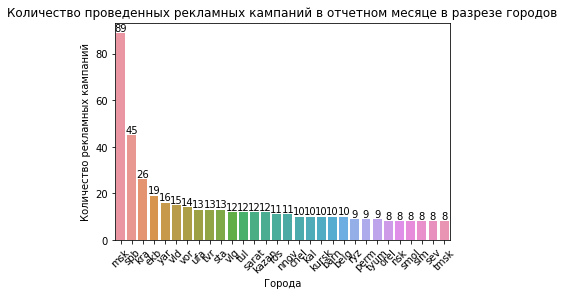

In [13]:
min_region = df.groupby(by = 'region', as_index=False).agg({'camp':'count'})
min_region = min_region.query('camp >= 8')['region']
df = df.query('region in @min_region')

region = df.groupby(by = 'region', as_index=False).agg({'camp':'count'}).sort_values(by='camp', ascending=False)
ax=sns.barplot(x='region', y='camp', data=region)
plt.title('Количество проведенных рекламных кампаний в отчетном месяце в разрезе городов')
plt.xlabel('Города')
plt.ylabel('Количество рекламных кампаний')
plt.bar_label(ax.containers[0])
plt.xticks(rotation=45)
# сохраним график в файл для будущей презентации
plt.savefig('plot_region.png');

Посмотрим на топ-10 городов, где реклама оказалась наиболее эффективной. Сравним доходы с расходами и выведем рейтинг:

In [14]:
top_region = df.groupby(by='region', as_index=False).agg(
    {'cost':'sum', 'revenue':'sum'})
top_region['revenue_vs_cost'] = top_region['revenue'] / top_region['cost']
top_region['cost_percent'] = 100 * top_region['cost'] / sum(top_region['cost'])
top_region['revenue_percent'] = 100 * top_region['revenue'] / sum(top_region['revenue'])
top_region = top_region.sort_values(by='revenue_vs_cost', ascending=False).head(10)
top_region

,region,cost,revenue,revenue_vs_cost,cost_percent,revenue_percent
26,vld,591828.40,1535677.00,2.59,1.46,2.00
8,msk,19299179.34,45353118.00,2.35,47.73,58.98
19,spb,6804493.79,14907997.00,2.19,16.83,19.39
28,vor,556994.53,977692.00,1.76,1.38,1.27
6,kra,1521491.57,2635032.00,1.73,3.76,3.43
3,ekb,1243319.32,2021615.00,1.63,3.07,2.63
13,ros,580288.04,936825.00,1.61,1.44,1.22
24,tyum,430973.56,640020.00,1.49,1.07,0.83
12,perm,529375.36,724391.00,1.37,1.31,0.94
9,nnov,796982.03,1060248.00,1.33,1.97,1.38


Предсказуемо самыми частыми для запуска рекламных кампаний оказались Москва и Санкт-Петербург (в эти же регионы была вложена наибольшая часть бюджета - 47.7% и 16.8% соответственно). Можно заметить, что в некоторых городах в отчетном месяце реклама была весьма эффективной, так как доходы практически в два или даже больше, чем в два раза превышают расходы. Соотвественно можно рассматривать эти регионы как наиболее перспективные с точки зрения получения выгоды.

Добавим в таблицу ещё категориальную переменную, где выделим главные группы для рекламных кампаний: поисковая, сети и ретаргетинг. Посмотрим, как они распределятся:

In [15]:
list = ['search', 'network', 'retargeting']
def category(cat):
    """
    Создадим функцию, которая будет проходиться по столбцу 'split' и сравнивать эти слова со списком категорий.
    При обнаружении совпадений функция будет присваивать категорию рекламной кампании.
    """ 
    for i in cat:
        if i in list:
            return i
    return 'other'

# применим функцию, создадим столбец с категориями кампаний
df['category'] = df['split'].apply(category)
df.sample(10)

,camp,cost,click_price,conv_price,trans_price,click_revenue,revenue,profit,split,region,category
218,yd_msk_couches_straight_general-words_search-v2,43187.18,93.68,959.72,0.00,0.73,0.00,0.01,"[yd, msk, couches, straight, general, words, s...",msk,search
133,yd_msk_magazin-mebeli_geo_search-v2,60846.80,54.23,790.22,60846.80,19.46,20980.00,0.36,"[yd, msk, magazin, mebeli, geo, search, v2]",msk,search
19,yd_spb_couches_specific_search_v5,320791.19,74.85,1887.01,106930.40,15.62,66270.00,0.21,"[yd, spb, couches, specific, search, v5]",spb,search
105,yd_msk_couches_general-akcii_network-v2_cpa,73142.54,5.92,1108.22,0.00,0.03,0.00,0.01,"[yd, msk, couches, general, akcii, network, v2...",msk,network
163,yd_vor_dsa_pg_search,51079.45,73.08,945.92,25539.72,280.73,196230.00,3.84,"[yd, vor, dsa, pg, search]",vor,search
317,yd_sev_couches_all-types_category_network,29013.39,36.68,483.56,0.00,0.00,0.00,0.00,"[yd, sev, couches, all, types, category, network]",sev,network
4,yd_spb_brand_search-v2,1044593.43,64.05,134.72,4002.27,520.98,8415962.00,8.13,"[yd, spb, brand, search, v2]",spb,search
308,yd_tul_mebel_all-types_network,30158.80,51.73,603.18,0.00,0.03,0.00,0.00,"[yd, tul, mebel, all, types, network]",tul,network
389,yd_kursk_mebel_all-types_network,20842.77,36.19,947.40,0.00,0.00,0.00,0.00,"[yd, kursk, mebel, all, types, network]",kursk,network
374,yd_tmsk_mebel_all-types_network,22966.11,37.96,260.98,0.00,0.00,0.00,0.00,"[yd, tmsk, mebel, all, types, network]",tmsk,network


In [16]:
df['category'].value_counts()

search         219
network        186
retargeting     50
other            3
Name: category, dtype: int64

In [17]:
top_category = df.groupby(by='category', as_index=False).agg(
    {'cost':'sum', 'revenue':'sum'}).sort_values(by='revenue', ascending=False)
top_category['revenue_vs_cost'] = top_category['revenue'] / top_category['cost']
top_category['cost_percent'] = 100 * top_category['cost'] / sum(top_category['cost'])
top_category['revenue_percent'] = 100 * top_category['revenue'] / sum(top_category['revenue'])
top_category

,category,cost,revenue,revenue_vs_cost,cost_percent,revenue_percent
3,search,23236622.12,54521144.00,2.35,57.46,70.90
2,retargeting,6554479.67,12504949.00,1.91,16.21,16.26
0,network,9096652.16,5605170.00,0.62,22.50,7.29
1,other,1549823.84,4270389.00,2.76,3.83,5.55


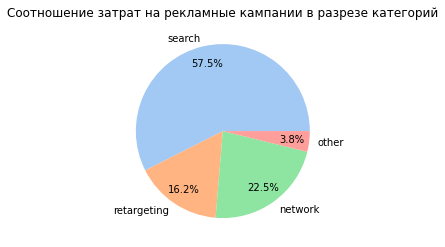

In [18]:
plt.pie(top_category['cost'], labels = top_category['category'], autopct='%.01f%%', pctdistance=0.8)
plt.title('Cоотношение затрат на рекламные кампании в разрезе категорий')
# сохраним график в файл для будущей презентации
plt.savefig('pie_cost.png')
plt.show()

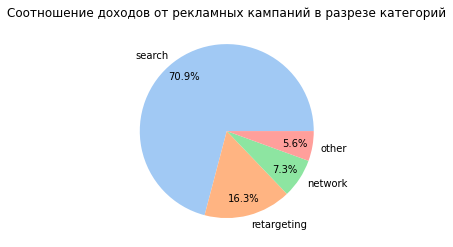

In [19]:
plt.pie(top_category['revenue'], labels = top_category['category'], autopct='%.01f%%', pctdistance=0.8)
plt.title('Cоотношение доходов от рекламных кампаний в разрезе категорий')
# сохраним график в файл для будущей презентации
plt.savefig('pie_revenue.png')
plt.show()

Мы можем заметить, что большая часть рекламных кампаний приходится на поисковую рекламу и рекламу в сетях. Наиболее эффективной показала себя поисковая реклама (доходы в 2.35 раза превышают расходы). Вместе с тем реклама в сетях не окупается. Затраты на поисковую рекламу составляют 57.5% бюджета, и при этом приносят 70.9% дохода. На сети расходуется 22.5% бюджета - эти рекламные кампании приносять лишь 7.3% дохода. Таким образом, уже предварительно можно сделать вывод: увеличивать рекламный бюджет целесообразно в поисковую рекламу и снижать в сетях.  
Интересно посмотреть, как приведённые рекламные кампании распределятся по типам: текстовая, баннерная и видео. По названиям рекламных кампаний нет признаков видео рекламы, так что произведем разбивку только на два других типа. Снова напишем функцию:

In [20]:
def type(t):
    """
    Создадим функцию, которая будет проходиться по столбцу 'split' и искать слово 'banner'.
    При обнаружении совпадений функция будет присваивать тип рекламной кампании.
    """ 
    for i in t:
        if i == 'banner':
            return i
    return 'text'

# применим функцию, создадим столбец с типами рекламы
df['type'] = df['split'].apply(type)
df.sample(10)

,camp,cost,click_price,conv_price,trans_price,click_revenue,revenue,profit,split,region,category,type
198,yd_msk_bedroom_bed_1-5-spalnaya_general-words_...,45713.12,182.85,662.51,0.00,0.00,0.00,0.00,"[yd, msk, bedroom, bed, 1, 5, spalnaya, genera...",msk,network,text
381,yd_ufa_couches_all-types_general_network,22226.53,44.45,673.53,0.00,0.00,0.00,0.00,"[yd, ufa, couches, all, types, general, network]",ufa,network,text
105,yd_msk_couches_general-akcii_network-v2_cpa,73142.54,5.92,1108.22,0.00,0.03,0.00,0.01,"[yd, msk, couches, general, akcii, network, v2...",msk,network,text
399,yd_vld_couches_all-types_category_network,19937.61,37.41,1049.35,0.00,0.00,0.00,0.00,"[yd, vld, couches, all, types, category, network]",vld,network,text
202,yd_spb_bed_size_search_v5,44995.52,80.21,978.16,44995.52,37.42,20990.00,0.47,"[yd, spb, bed, size, search, v5]",spb,search,text
178,yd_orel_mebel_all-types_network,48578.95,41.77,385.55,48578.95,11.17,12990.00,0.27,"[yd, orel, mebel, all, types, network]",orel,network,text
18,yd_msk_couches_specific_search_v5,349809.58,83.57,1590.04,349809.58,30.34,124450.00,0.36,"[yd, msk, couches, specific, search, v5]",msk,search,text
467,yd_sarat_couches_general-words_search-v3_old,14187.43,33.46,363.78,0.00,0.08,0.00,0.00,"[yd, sarat, couches, general, words, search, v...",sarat,search,text
225,yd_sim_couches_kreslo_all-types_search,41834.74,43.00,853.77,0.00,0.00,0.00,0.00,"[yd, sim, couches, kreslo, all, types, search]",sim,search,text
32,yd_msk_couches_type_search_v5_old,207343.28,59.96,1191.63,103671.64,17.04,55470.00,0.28,"[yd, msk, couches, type, search, v5, old]",msk,search,text


In [21]:
df['type'].value_counts()

text      417
banner     41
Name: type, dtype: int64

По большей части реклама имеет текстовый тип. Интересно, какие рекламные кампании представлены баннерами:

In [22]:
df[df['type'] == 'banner']['category'].value_counts()

retargeting    41
Name: category, dtype: int64

In [23]:
top_type = df.groupby(by='type', as_index=False).agg(
    {'cost':'sum', 'revenue':'sum'}).sort_values(by='revenue', ascending=False)
top_type['revenue_vs_cost'] = top_type['revenue'] / top_type['cost']
top_type['cost_percent'] = 100 * top_type['cost'] / sum(top_type['cost'])
top_type['revenue_percent'] = 100 * top_type['revenue'] / sum(top_type['revenue'])
top_type

,type,cost,revenue,revenue_vs_cost,cost_percent,revenue_percent
1,text,34607295.10,65993482.00,1.91,85.58,85.82
0,banner,5830282.69,10908170.00,1.87,14.42,14.18


Таким образом, мы видим, что сравнение рекламных кампаний в разрезе "баннеры - текст" не особо информативно, так как оба типа имеют примерно одинаковую эффективность. Имеет смысл углубляться в каждую группу, находить критерии для дополнительной классификации, и только потом делать выводы о том, какая, например, текстовая релама работает, а какая нет.

Вспомогательный столбец 'split' больше нам не понадобится, удалим его:

In [24]:
df.drop(columns = ['split'],axis = 1, inplace=True)
df.head()

,camp,cost,click_price,conv_price,trans_price,click_revenue,revenue,profit,region,category,type
0,yd_msk_brand_search-v2,3041597.51,71.48,165.51,5570.69,473.17,19881597.00,6.62,msk,search,text
1,yd_msk_dsa_pg_search,1689478.74,74.74,830.21,25991.98,113.49,2536950.00,1.52,msk,search,text
2,yd_msk_magazin-mebeli_asmaster,1066203.80,98.04,358.99,15913.49,220.69,2374281.00,2.25,msk,other,text
3,yd_spb_smart_banner_retargeting_new_lal_roi,1059525.28,60.89,365.35,24080.12,85.15,1455046.00,1.40,spb,retargeting,banner
4,yd_spb_brand_search-v2,1044593.43,64.05,134.72,4002.27,520.98,8415962.00,8.13,spb,search,text


 <a id='anchor_3'></a>
## Оценка результативности проведенных рекламных кампаний и гипотезы по увеличению дохода

Для формулирования более четких гипотез по увеличению дохода, произведём сравнение эффективности рекламных кампаний по двум факторам одновременно: регион и категория. Обратимся к топ-10 городов и посмотрим результаты на диаграмме:

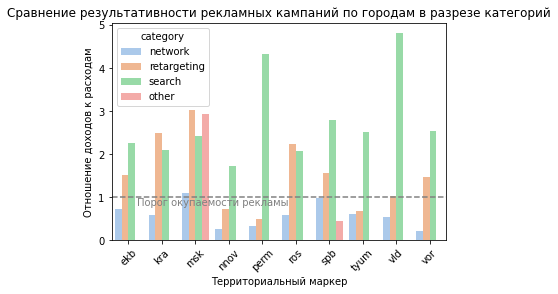

In [25]:
top_cities = top_region['region']
region_plot = df.query('region in @top_cities').groupby(
    by = ['region', 'category'], as_index=False).agg({'cost':'sum', 'revenue':'sum'})
region_plot['revenue_vs_cost'] = region_plot['revenue'] / region_plot['cost']
sns.barplot(x='region', y='revenue_vs_cost', hue='category', data=region_plot)
plt.axhline(y=1, color='grey', linestyle='--')
plt.text(0.25, 0.8, 'Порог окупаемости рекламы', color='grey')
plt.title('Сравнение результативности рекламных кампаний по городам в разрезе категорий')
plt.xlabel('Территориальный маркер')
plt.ylabel('Отношение доходов к расходам')
plt.xticks(rotation=45)
# сохраним график в файл для будущей презентации
plt.savefig('region_category.png');

Наши предварительные предположения подтверждаются - практически во всех городах реклама в сетях не окупается. Поисковая же реклама везде даёт хороший результат. В Москве и Краснодаре хорошо себя показывает и ретаргетинг.

*Таким образом, с целью увеличения дохода можно предпринять следующие действия (вариативно или одновременно по желанию):*  
1) Снять бюджет с "нулевых" кампаний (которые в отчетном месяце не принесли доход) и распределить его на 10 ведущих городов в поисковую рекламу.  
2) В Краснодаре и Москве можно перераспределить часть бюджета сетевой рекламы на ретаргетинг.  
3) Перераспределять можно не только "нулевые" кампании, но и не окупаемые. Найти отношение дохода и расхода по каждой рекламной кампании и отсортировать те, где данный показатель ниже единицы - эти кампании в отчетном месяце не окупились.  
4) Можно перераспределять бюджет между регионами - из неокупаемых "перелить" в окупаемые города.

Однако, следует отметить, что можно "упереться в потолок" рекламной кампании. Это такая ситуация, когда кампания максимально себя окупает. Дополнительные финансовые вливания не приносят новых кликов и, соответственно, доход. Поэтому следует осторожно перераспределять бюджет и наблюдать показатели в динамике.

Попробуем оценить размер предполагаемой выгоды от первого из перечисленных алгоритмов. Рассчитаем, во сколько раз в среднем доходы в топ-10 городах превышают доходы по поисковой рекламе. И далее, имея цифру перераспределяемого бюджета, рассчитаем предположительный доход от такого перераспределения бюджета:

In [26]:
koef = sum(region_plot[region_plot['category'] == 'search']['revenue'])/sum(
    region_plot[region_plot['category'] == 'search']['cost'])
print('Коэффициент для расчета предполагаемого дохода: ', round(koef, 2))
print('Бюджет для перераспределения: ', round(null_cost,  2))
print('Необходимый прирост дохода: ', round(delta_revenue, 2))
print('Предположительный доход от такого перераспределения бюджета: ', round(koef*null_cost, 2))

Коэффициент для расчета предполагаемого дохода:  2.5
Бюджет для перераспределения:  8209048.51
Необходимый прирост дохода:  7821712.7
Предположительный доход от такого перераспределения бюджета:  20549709.33


Данный расчет очень условный с большим количеством допущений. В реальности картина будет иной, так как на результат могут повлиять многочисленные факторы, о которых в рамках текущего исследования нет информации. Каждую из гипотез можно попробовать обсчитать и выбрать наилучшую стратегию.

 <a id='anchor_4'></a>
 ## Общий вывод
 
 В рамках текущего исследования мы изучили сведения о проведённых рекламных кампаниях крупного мебельного магазина в отчетном месяце.
 
 В назнаниях рекламных кампаний было "зашито" много полезной информации, благодаря которой мы выделили факторы, влияющие на успешность рекламной кампании, и произвели сравнение. Такими факторами оказался территориальный маркер и категория рекламной кампании (поиск, сети, ретаргетинг). Установили, что большая часть рекламных кампаний (а, соответственно, и финансовых вложений) была осуществлена в Москве (89 рекламных кампаний) и в Санкт-Перетбурге (45 рекламных кампаний).  
 Оценив соотношение расходов и доходов в разрезе категорий предварительно можно было заключить, что поисковая реклама проявляет себя хорошо (57.5% бюджета на выходе приносят 70.9% дохода) и реклама в сетях себя не оправдывает (22.5% бюджета приносят только 7.3% дохода).
 
 Была рассчитана дополнительная метрика: отношение доходов к расходам в рамках каждой группы. Таким образом, мы сумели отобрать 10 городов, где реклама в отчетном месяце показала себя наилучшим образом. Далее мы сравнили поведение показателей внутри каждого из этих городов. Была обнаружена общая тенденция - поисковая реклама во всех городах в отчетном месяце была успешной, а реклама в сетях не окупалась. В Москве и Краснодаре хорошо себя показывает и ретаргетинг.
 
 *Таким образом, с целью увеличения дохода можно предпринять следующие действия (вариативно или одновременно по желанию):*  
1) Снять бюджет с "нулевых" кампаний (которые в отчетном месяце не принесли доход) и распределить его на 10 ведущих городов в поисковую рекламу.  
2) В Краснодаре и Москве можно перераспределить часть бюджета сетевой рекламы на ретаргетинг.  
3) Перераспределять можно не только "нулевые" кампании, но и не окупаемые. Найти отношение дохода и расхода по каждой рекламной кампании и отсортировать те, где данный показатель ниже единицы - эти кампании в отчетном месяце не окупились.  
4) Можно перераспределять бюджет между регионами - из неокупаемых "перелить" в окупаемые города.

Мы произвели условный расчет выгоды первого сценария. Поставленная задача увеличить доход не менее, чем на 10%, подтвердилась. Однако, следует иметь в виду, что в реальности картина может оказаться другой. На результат могут повлиять факторы, не учтенные в текущем исследовании.

По текущему исследованию была подготовлена презентация в формате pdf:  
[Презентация](https://drive.google.com/file/d/1X3zHlg484m9pDsXnevgDoS268LRHAapE/view?usp=sharing)